In [125]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [126]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'TSLA'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [127]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,274.970001,266.299988,269.690002,273.600006,6908200,273.600006
2019-03-21,276.450012,268.450012,272.600006,274.019989,5947100,274.019989
2019-03-22,272.799988,264.000000,272.579987,264.529999,8745600,264.529999
2019-03-25,263.179993,254.460007,259.709991,260.420013,10215000,260.420013
2019-03-26,270.260010,264.429993,264.440002,267.769989,7350900,267.769989


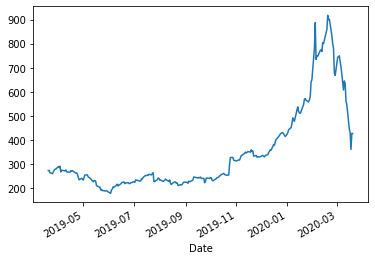

In [128]:
%matplotlib inline
data.Close.plot()

In [129]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [130]:
df = BBANDS(data,20)

In [131]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

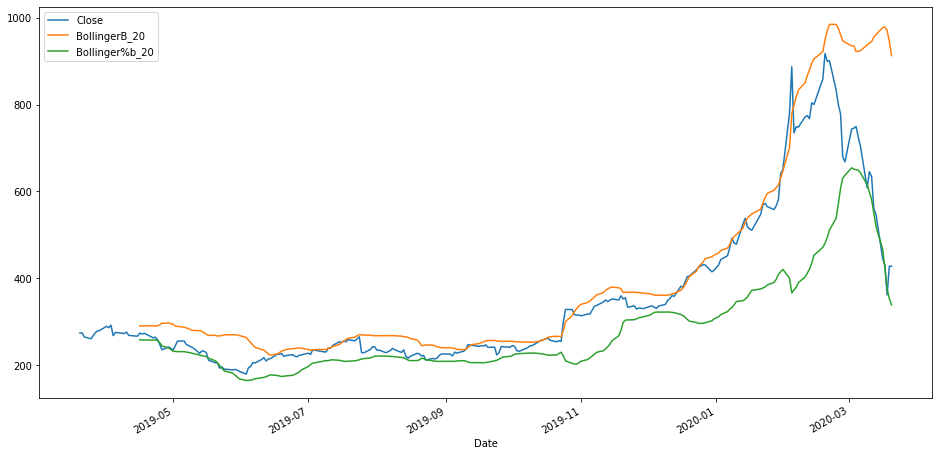

In [132]:
df2.plot(figsize = (16,8))

In [133]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [134]:
pd.set_option('display.max_rows', None)

In [135]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,273.600006,Sin informacion,-
2019-03-21,274.019989,Sin informacion,-
2019-03-22,264.529999,Sin informacion,-
2019-03-25,260.420013,Sin informacion,-
2019-03-26,267.769989,Sin informacion,-
2019-03-27,274.829987,Sin informacion,-
2019-03-28,278.619995,Sin informacion,-
2019-03-29,279.859985,Sin informacion,-
2019-04-01,289.179993,Sin informacion,-
